In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [40]:
data_f=pd.read_csv('SuperMarketSales.csv')
data_f.head(5)

,Store,Date,Temperature,Fuel_Price,CPI,Weekly_Sales
0,1,5/2/2010,42.31,2.572,211.096358,1643690.90
1,1,12/2/2010,38.51,2.548,211.242170,1641957.44
2,1,19-02-2010,39.93,2.514,211.289143,1611968.17
3,1,26-02-2010,46.63,2.561,211.319643,1409727.59
4,1,5/3/2010,46.50,2.625,211.350143,1554806.68


# exploraty for data

In [41]:
print(data_f.shape)
print(data_f.info())

(6435, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Weekly_Sales  6435 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 301.8+ KB
None


In [42]:
print(data_f.describe().round(1))
print('#'*40)
print(data_f.duplicated().sum())

        Store  Temperature  Fuel_Price     CPI  Weekly_Sales
count  6435.0       6435.0      6435.0  6435.0        6435.0
mean     23.0         60.7         3.4   171.6     1046964.9
std      13.0         18.4         0.5    39.4      564366.6
min       1.0         -2.1         2.5   126.1      209986.2
25%      12.0         47.5         2.9   131.7      553350.1
50%      23.0         62.7         3.4   182.6      960746.0
75%      34.0         74.9         3.7   212.7     1420158.7
max      45.0        100.1         4.5   227.2     3818686.4
########################################
0


In [43]:
print(data_f.isna().sum())


Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Weekly_Sales    0
dtype: int64


## preprocessing 

In [44]:
data_f['Date']=pd.to_datetime(data_f['Date'],dayfirst=True)
data_f['Date'].dt.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Date, Length: 6435, dtype: int64

# splitaing for data

In [45]:
# feature and target
x_data=data_f.iloc[:,0:1]
y=data_f['Weekly_Sales']
print(x_data,y)

      Store
0         1
1         1
2         1
3         1
4         1
...     ...
6430     45
6431     45
6432     45
6433     45
6434     45

[6435 rows x 1 columns] 0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64


### visualization for the first column ('store') with target

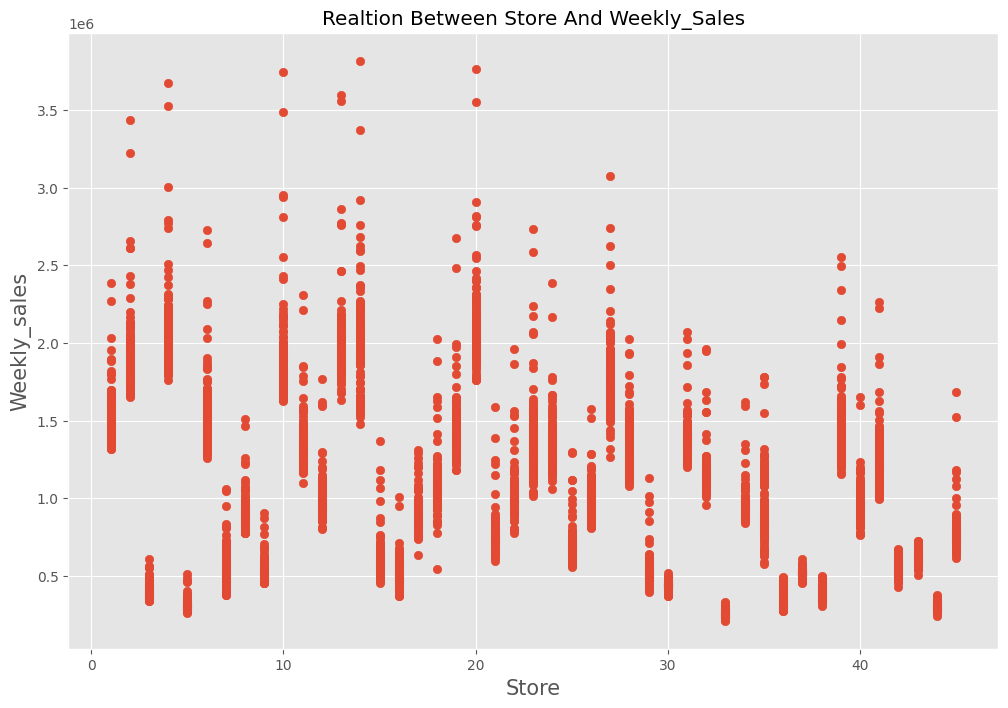

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('realtion between store and weekly_sales '.strip().title())
plt.scatter(x_data,y)
plt.xlabel('store'.capitalize(),fontsize=15)
plt.ylabel('Weekly_sales' ,fontsize=15)
plt.savefig('show1.png')
plt.show()

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.33)
print('x_shape',x_data.shape)
print('y_shape',y.shape)
print('x_train.shape',x_train.shape)
print('x_tets_shape',x_test.shape)


x_shape (6435, 1)
y_shape (6435,)
x_train.shape (4311, 1)
x_tets_shape (2124, 1)


In [48]:
x_data=x_data.values.reshape((-1,1))
y=y.values.reshape((-1,1))
model=LinearRegression()
model.fit(x_data,y)

LinearRegression()

In [49]:
y_predic=model.predict(x_data)
print('mean_squared_error for Store is = '.title(),mean_squared_error(y_predic,y))

Mean_Squared_Error For Store Is =  282650116531.1437


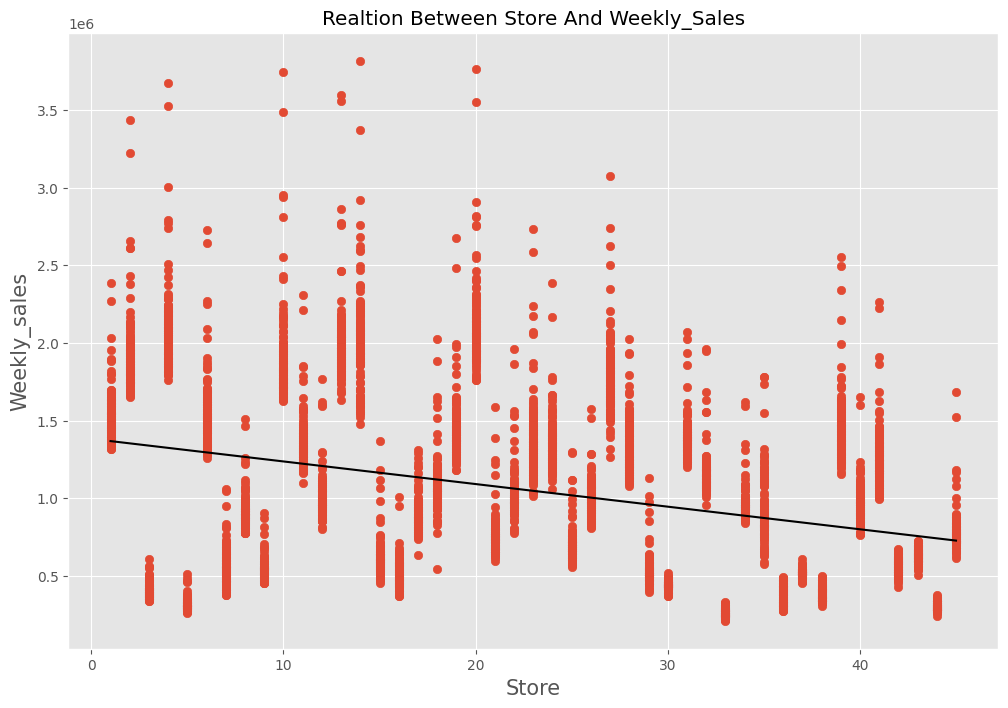

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('realtion between store and weekly_sales '.strip().title())
plt.scatter(x_data,y)
plt.xlabel('store'.capitalize(),fontsize=15)
plt.ylabel('Weekly_sales' ,fontsize=15)
plt.plot(x_data,y_predic,color='black')
plt.savefig('realtion between store and weekly_sales.png')
plt.show()

## Column Date

In [51]:
x_feat=data_f['Date'].dt.year
x_feat=x_feat.values.reshape(-1,1)
model.fit(x_feat,y)
y_predic1=model.predict(x_feat)
print('mean_squared_error for Date is = '.strip().title(),mean_squared_error(y_predic1,y))

Mean_Squared_Error For Date Is = 318352632777.9655


#####  Column Temperature

In [52]:
x_feat=data_f['Temperature'].values.reshape(-1,1)
model.fit(x_feat,y)
y_predic2=model.predict(x_feat)
print('mean_squared_error for Temperature is = '.strip().title(),mean_squared_error(y_predic2,y))

Mean_Squared_Error For Temperature Is = 317163507625.06067


#### #visulization beteen Temperature and weekly_sales

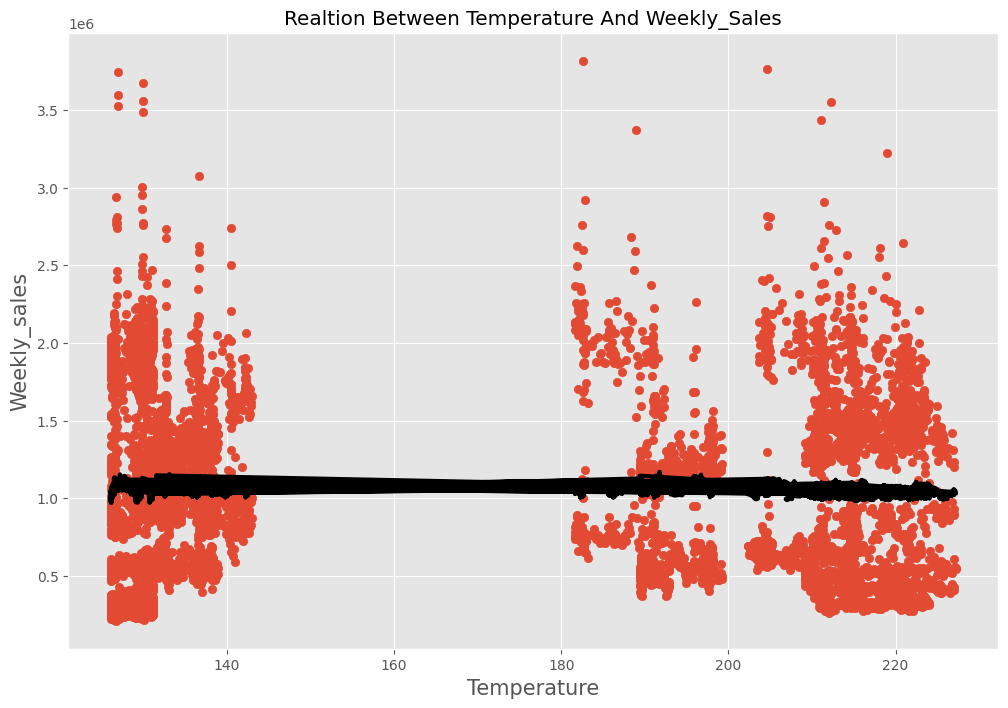

In [61]:

plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('realtion between Temperature and weekly_sales '.strip().title())
plt.scatter(x_feat,y)
plt.xlabel('Temperature'.capitalize(),fontsize=15)
plt.ylabel('Weekly_sales' ,fontsize=15)
plt.plot(x_feat,y_predic2,color='black',linewidth=3)
plt.savefig('relation Temperature and Target.png')
plt.show()


####   Fuel_Price

In [54]:
x_feat=data_f['Fuel_Price'].values.reshape(-1,1)
model.fit(x_feat,y)
y_predic3=model.predict(x_feat)
print('mean_squared_error for Fuel_Price is = '.strip().title(),mean_squared_error(y_predic3,y))

Mean_Squared_Error For Fuel_Price Is = 318431665304.0493


##### #visulization beteen   Fuel_Price and weekly_sales 


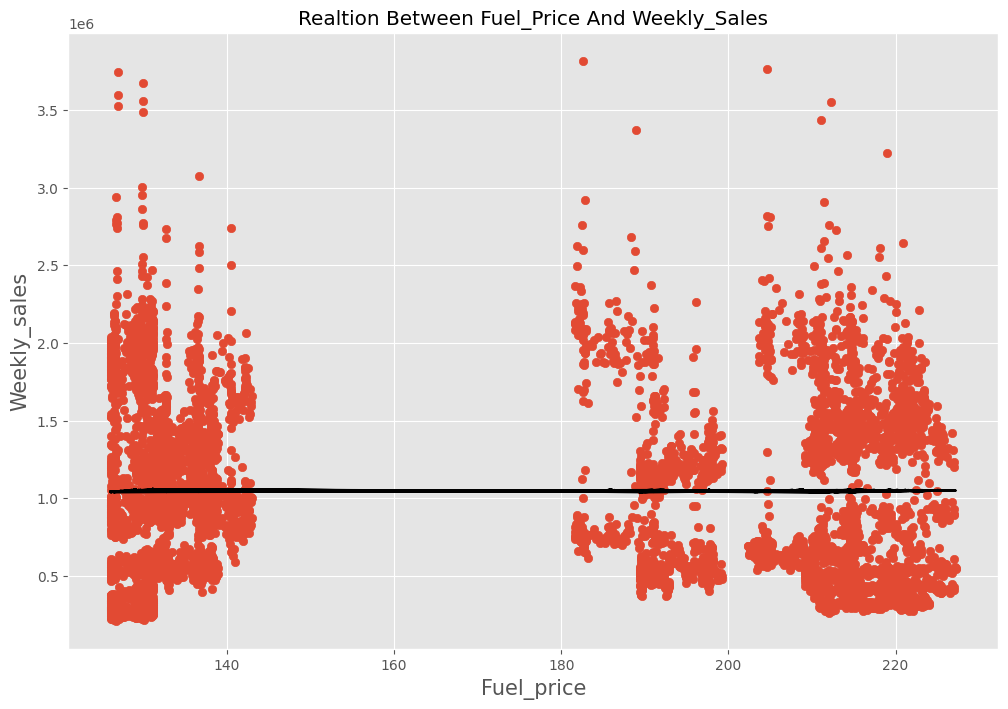

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('realtion between Fuel_Price and weekly_sales '.strip().title())
plt.scatter(x_feat,y)
plt.xlabel('Fuel_Price'.capitalize(),fontsize=15)
plt.ylabel('Weekly_sales' ,fontsize=15)
plt.plot(x_feat,y_predic3,color='black')
plt.savefig('relation Fuel_price and Target.png')
plt.show()


### CPI MODEL

In [56]:
x_feat=data_f['CPI'].values.reshape(-1,1)
model.fit(x_feat,y)
y_predic4=model.predict(x_feat)
print('mean_squared_error for CPI is = '.strip().title(),mean_squared_error(y_predic4,y))

Mean_Squared_Error For Cpi Is = 316780080376.6066


#### #visulization beteen CPI and weekly_sales 

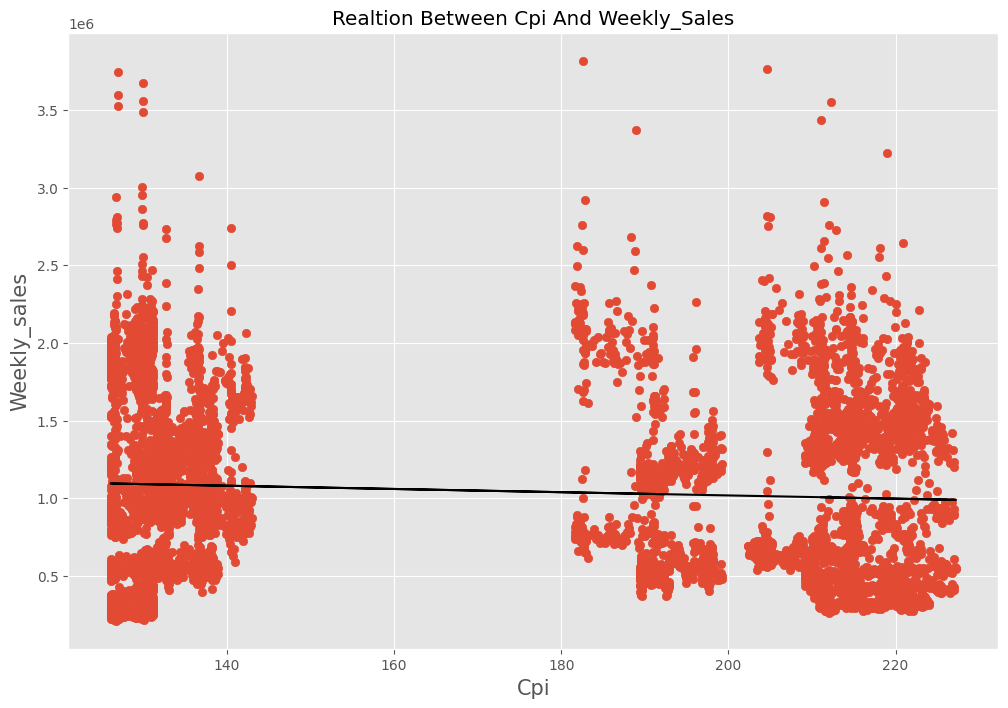

In [59]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('realtion between CPI and weekly_sales '.strip().title())
plt.scatter(x_feat,y)
plt.xlabel('CPI'.capitalize(),fontsize=15)
plt.ylabel('Weekly_sales' ,fontsize=15)
plt.plot(x_feat,y_predic4,color='black')
plt.savefig('relation CPI and Target.png')
plt.show()


## all mean squered error

In [58]:
print('mean_squared_error for Store is = '.title(),mean_squared_error(y_predic,y))
print('mean_squared_error for Date is = '.strip().title(),mean_squared_error(y_predic1,y))
print('mean_squared_error for Temperature is = '.strip().title(),mean_squared_error(y_predic2,y))
print('mean_squared_error for Fuel_Price is = '.strip().title(),mean_squared_error(y_predic3,y))
print('mean_squared_error for CPI is = '.strip().title(),mean_squared_error(y_predic4,y))


Mean_Squared_Error For Store Is =  282650116531.1437
Mean_Squared_Error For Date Is = 318352632777.9655
Mean_Squared_Error For Temperature Is = 317163507625.06067
Mean_Squared_Error For Fuel_Price Is = 318431665304.0493
Mean_Squared_Error For Cpi Is = 316780080376.6066
